In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class NeuralNetwork:
    
    def __init__(self, inputLayerSize, hiddenLayerSize, outputLayerSize):
        self.inputLayerSize = inputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        self.outputLayerSize = outputLayerSize 
        self.w1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.w2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)    
    
    def activationFunction(self, z):
        return 1 / (1 + np.exp(-z))
    def activationFunctionPrime(self, z):
        return self.activationFunction(z) * (1 - self.activationFunction(z))    
    
    def forward(self):
        self.z2 = np.dot(self.x, self.w1)
        self.a = self.activationFunction(self.z2)
        self.z3 = np.dot(self.a, self.w2)
        self.yHat = self.activationFunction(self.z3)   
        
    def costFunctionPrime(self):
        self.a = self.a[:,np.newaxis]
        self.z3 = self.z3[:,np.newaxis]        
        self.x = self.x[:,np.newaxis]

        delta3 = np.multiply(-(self.y-self.yHat), self.activationFunctionPrime(self.z3))
        dJdw2 = np.dot(self.a, delta3)

        delta2 = np.dot(delta3, self.w2.T)*self.activationFunctionPrime(self.z2)
        dJdw1 = np.dot(self.x, delta2)
        
        return dJdw1, dJdw2
    
    def backward(self):    
        dJdw1, dJdw2 = self.costFunctionPrime()
        self.w1 = self.w1 - dJdw1 * self.eta
        self.w2 = self.w2 - dJdw2 * self.eta
        
    def error(self, y, yHat):
        return sum((y - yHat) ** 2)
        
    def train(self, x, y, n_iter = 1e4, eta = 1e-2):
        self.yHat = np.full(shape=y.shape, fill_value=0)
        self.eta = eta
        indexes = np.arange(len(x))
        np.random.shuffle(indexes)
        i = 0
        current_diff = 1
        errors = []
        while i < n_iter:
            ind = indexes[i % len(x)]
            self.x = x[ind]
            self.y = y[ind]
            self.forward()
            self.backward()
            errors.append(self.error(y, self.predict(x)))
            i += 1
        return (self.w1, self.w2), errors
        
    def predict(self, x):
        self.x = x;
        self.forward()
        return np.round(self.yHat)

In [3]:
train_x = np.array(np.random.randn(200,2)*50).astype(int)
train_y = []
for point in train_x:
    train_y.append(0 if point[0] <= point[1] else 1)
train_y = np.array(train_y)[:,np.newaxis]
train_ans = np.hstack((train_x,train_y))

print (train_ans[:5])

[[ -50  -21    0]
 [ -47   23    0]
 [-107   88    0]
 [  12   71    0]
 [  57  -32    1]]


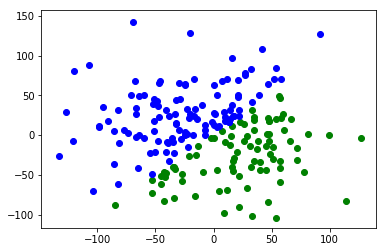

In [4]:
class0_x = []
class0_y = []
class1_x = []
class1_y = []
for point in train_ans:
    if point[2] == 0:
        class0_x.append(point[0])
        class0_y.append(point[1])
    else:
        class1_x.append(point[0])
        class1_y.append(point[1])
        
plt.figure()
plt.scatter(class1_x, class1_y, c='Green')
plt.scatter(class0_x, class0_y, c='Blue')
plt.show()

In [5]:
nn = NeuralNetwork(2,5,1)
weights, errors = nn.train(train_x,train_y,n_iter=1e4,eta=1e-2)

In [6]:
print (errors[:5])
print (errors[-5:])

[array([ 80.]), array([ 80.]), array([ 79.]), array([ 79.]), array([ 79.])]
[array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.])]


In [7]:
test_x = np.array(np.random.randn(100,2)*50).astype(int)
test_y = []
for point in test_x:
    test_y.append(np.round(nn.predict(point)))
test_ans = np.hstack((test_x,test_y))
print (test_ans[:5])

[[ 51. -47.   1.]
 [ 98. -91.   1.]
 [ 20. -22.   1.]
 [ 38.  17.   1.]
 [-62.  55.   0.]]


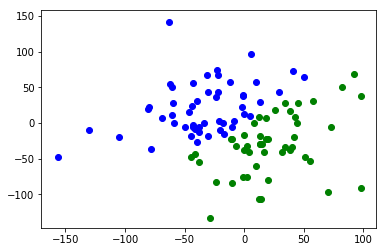

In [8]:
class0_x = []
class0_y = []
class1_x = []
class1_y = []
for point in test_ans:
    if point[2] == 0:
        class0_x.append(point[0])
        class0_y.append(point[1])
    else:
        class1_x.append(point[0])
        class1_y.append(point[1])
        
plt.figure()
plt.scatter(class1_x, class1_y, c='Green')
plt.scatter(class0_x, class0_y, c='Blue')
plt.show()

In [9]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 1), random_state=1)
clf.fit(train_x, train_y)    
sklearn_y = clf.predict(test_x)
sklearn_ans = np.hstack((test_x,sklearn_y[:,np.newaxis]))

/home/masha/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


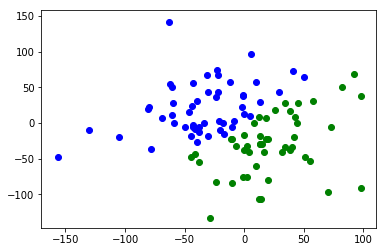

In [10]:
class0_x = []
class0_y = []
class1_x = []
class1_y = []
for point in sklearn_ans:
    if point[2] == 0:
        class0_x.append(point[0])
        class0_y.append(point[1])
    else:
        class1_x.append(point[0])
        class1_y.append(point[1])
        
plt.figure()
plt.scatter(class1_x, class1_y, c='Green')
plt.scatter(class0_x, class0_y, c='Blue')
plt.show()